## Train the model based Using YOLOv8:

In [2]:
##first let's import our library 
import ultralytics
from ultralytics import YOLO

model = YOLO('yolov8.pt')  # load the pretraind model or we can simply use this command for training from scratch 'model = YOLO('yolov8.yaml')
model.train(data="path/to/yaml",val=False,epochs=300) # start training ! specify the parameters as you want epochs , batch seze,...

## validate your Model

In [ ]:
results = model.val(data='path/to/yaml') ##Validate your model 

## Feature extraction :

In [1]:
import torch
from torchvision import transforms
from PIL import Image, ImageDraw
from pathlib import Path
from ultralytics import YOLO
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from pathlib import Path
from ultralytics import YOLO
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.patches import Rectangle
import numpy as np
import seaborn as sns
from matplotlib.colors import to_rgba_array

# Define hook function
def hook_fn(module, input, output):
    intermediate_features.append(output)

# Define feature extraction function
def extract_features(model, img, layer_index=20):
    global intermediate_features
    intermediate_features = []
    hook = model.model.model[layer_index].register_forward_hook(hook_fn)
    print(hook)
    with torch.no_grad():
        model(img)
    hook.remove()
    return intermediate_features[0]  # Access the first element of the list

# Load YOLOv8 model
weights_path = Path("C:/Users/alaa9/Desktop/Codes/runs/detect/train7/weights/best.pt")
model = YOLO(weights_path)

def preprocess_image(img_path):
    transform = transforms.Compose([
        transforms.Resize((640, 640)),
        transforms.Grayscale(num_output_channels=3),  # Convert to RGB
        transforms.ToTensor(),
        transforms.Normalize(mean=0., std=1.)
    ])
    img = Image.open(img_path)
    img = transform(img)
    img = img.unsqueeze(0)
    
    return img



img = Path(r'##') #Drage your image path here

img = preprocess_image(img)
features = extract_features(model, img, layer_index=20)



0: 640x640 1 G, 6.1ms
Speed: 1.0ms preprocess, 6.1ms inference, 438.2ms postprocess per image at shape (1, 3, 640, 640)


## Plot the feature extracted:

0: 640x640 1 G, 58.9ms
Speed: 4.1ms preprocess, 58.9ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)
Features shape for 1-17-dcm_f0b58d41c5f840a08ecbdedbbf6cc57d_jpg.rf.dcf86d0547d2f946048af95130a8d00d.jpg: torch.Size([1, 768, 20, 20])


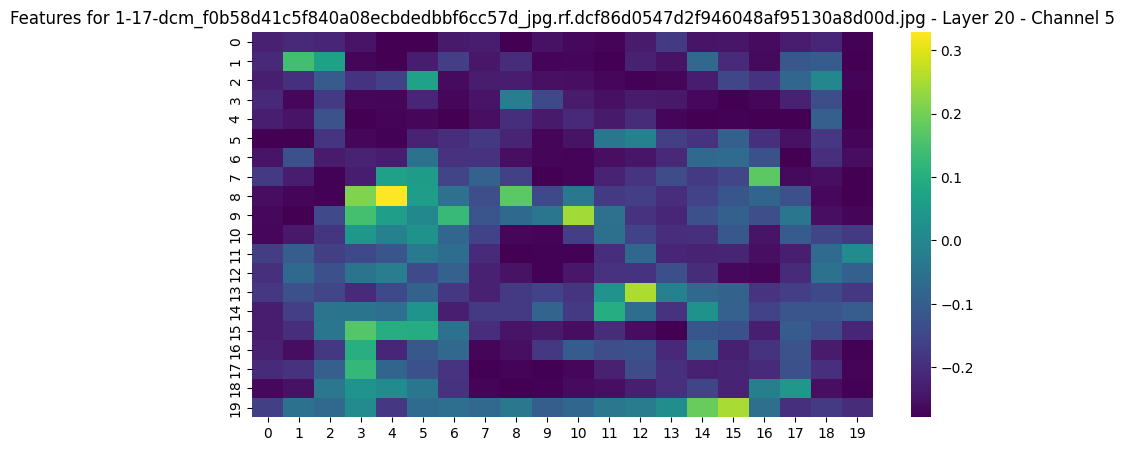

In [2]:
def extract_and_plot_features(img_path, layer_index=20, channel_index=5):
    
    img = preprocess_image(img_path)
    features = extract_features(model, img, layer_index)

        # Print the shape of the features
    print(f"Features shape for {img_path.name}: {features.shape}")

        # Plot the features as a heatmap for a specific channel
    plt.figure(figsize=(10, 5))
    sns.heatmap(features[0][channel_index].cpu().numpy(), cmap='viridis', annot=False)
    plt.title(f'Features for {img_path.name} - Layer {layer_index} - Channel {channel_index}')
    plt.show()

image = Path(r"##") #Drage your image path here
extract_and_plot_features(image, layer_index=20)